## 题目一：采用 scikit-learn 中的线性 SVM 对 iris 数据集进行二分类

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#### （1）选取两个特征和两类数据使用 scikit-learn 中的 SVM 进行二分类。

In [17]:
# 加载 iris 数据集
iris = datasets.load_iris()
X = iris.data[:, :2]  # 只选取前两个特征：花萼长度和花萼宽度
y = iris.target

# 选择 Setosa 和 Versicolor 两类
X = X[y != 2]  # 只选择类别为 0 和 1 的数据
y = y[y != 2]  # 只选择类别为 0 和 1 的标签

# 数据集划分：70%训练集，30%测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 数据归一化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [18]:
# 创建线性 SVM 模型
svm = SVC(kernel='linear', C=10.0)

# 训练模型
svm.fit(X_train, y_train)


SVC(C=10.0, kernel='linear')

#### （2）输出：决策边界的参数和截距、支持向量等。

In [19]:
# 输出决策边界的参数和截距
print("决策边界的参数 (weights):", svm.coef_)
print("截距 (intercept):", svm.intercept_)
print("支持向量 (support vectors):", svm.support_vectors_)
print("支持向量的数量:", len(svm.support_vectors_))

决策边界的参数 (weights): [[ 4.20328347 -2.40806107]]
截距 (intercept): [1.17863706]
支持向量 (support vectors): [[ 0.02360879  0.94603927]
 [-1.47876892 -1.67664385]
 [-0.87781783 -1.45808693]
 [-0.12662898 -0.14674537]]
支持向量的数量: 4


#### （3）可视化：通过散点图可视化数据样本（之前选择的两个特征），并画出决策边界和 2 个最大间隔边界，标出支持向量。

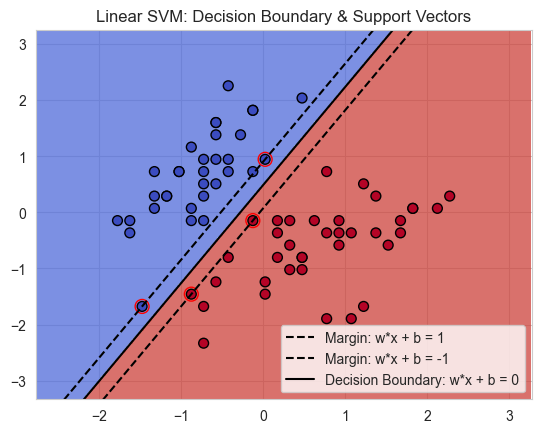

In [20]:
# 绘制决策边界的函数
def plot_decision_boundary(svm, X, y, title):
    h = 0.02  # 步长
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 绘制等高线（决策边界）
    plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.coolwarm)
    
    # 绘制训练数据点
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm, s=50, marker='o')

    # 绘制支持向量
    plt.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], facecolors='none', edgecolors='r', s=100, marker='o')

    # 绘制最大间隔边界
    # 超平面的法向量 w 和偏置项 b
    w = svm.coef_[0]
    b = svm.intercept_[0]

    # 计算最大间隔边界的两个线：w * x + b = 1 和 w * x + b = -1
    xx = np.linspace(x_min, x_max)
    yy_1 = (-w[0] * xx - b + 1) / w[1]  # 计算 y 值，w * x + b = 1
    yy_2 = (-w[0] * xx - b - 1) / w[1]  # 计算 y 值，w * x + b = -1
    
    # 绘制最大间隔边界线
    plt.plot(xx, yy_1, 'k--', label='Margin: w*x + b = 1')
    plt.plot(xx, yy_2, 'k--', label='Margin: w*x + b = -1')

    # 绘制决策边界线
    yy_decision = (-w[0] * xx - b) / w[1]  # 计算 y 值，w * x + b = 0
    plt.plot(xx, yy_decision, 'k-', label='Decision Boundary: w*x + b = 0')

    # 设置图形范围
    ax = plt.gca()
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    plt.title(title)
    plt.legend()
    plt.show()

plot_decision_boundary(svm, X_train, y_train, "Linear SVM: Decision Boundary & Support Vectors")


#### 【讨论一】选取的两个特征能否线性可分？若线性可分，可选择 scikit-learn 中何种 SVM 进行建模？若线性不可分，可选择 scikit-learn 中何种 SVM 进行建模？

通过绘制决策边界图，我们可以看到所选的两个特征（花萼长度和花萼宽度）是否能线性可分。

- **如果数据线性可分**（即，可以用一条直线将两类数据分开），那么可以选择线性核的 SVM 来建模。
- **如果数据线性不可分**（即，无法通过一条直线将两类数据完全分开），则可以考虑使用非线性核函数（例如 RBF 核、Polynomial 核等）。

#### 【讨论二】SVM 中的惩罚系数 C 对模型有何影响？




（1）尝试改变惩罚系数 C，分析其变化对应间隔宽度、支持向量数量的变化趋势，并解释原因。

惩罚系数 C 控制模型对训练集误差的容忍度。较小的 C 值允许更多的误分类样本，模型会选择更大的间隔以减少模型复杂度；而较大的 C 值则会促使模型尽量不容忍误分类，从而可能导致间隔较小，但分类准确率提高。

- **C 值较小（如 0.01）：** 允许模型有较大的间隔，因此支持向量会较少，模型对训练数据的误差容忍度较高。
- **C 值较大（如 100）：** 模型尝试将所有训练样本分类正确，间隔变小，支持向量的数量增加。


C = 0.01
  决策边界的参数 (weights): [[ 0.45103617 -0.39387214]]
  截距 (intercept): [0.08175902]
  支持向量的数量: 66



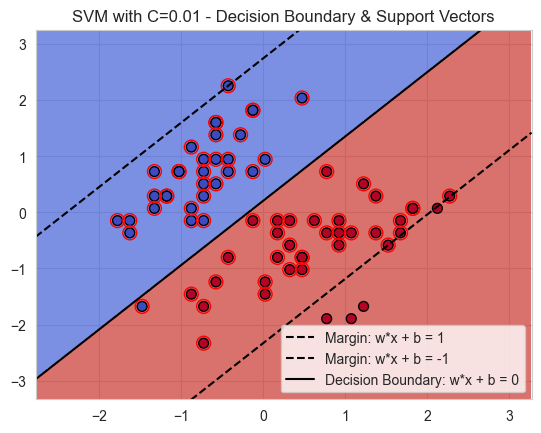

C = 0.1
  决策边界的参数 (weights): [[ 0.92604598 -0.81018176]]
  截距 (intercept): [0.21257385]
  支持向量的数量: 25



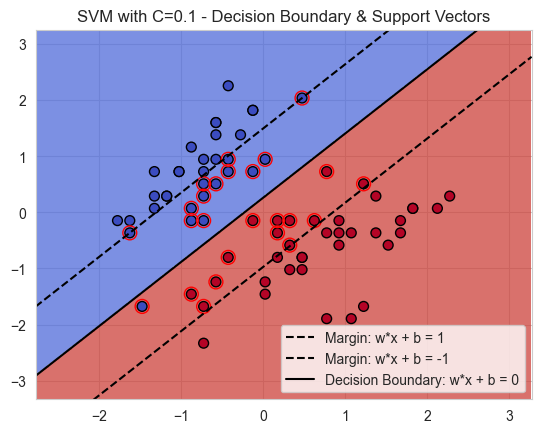

C = 1.0
  决策边界的参数 (weights): [[ 1.90174734 -1.52515553]]
  截距 (intercept): [0.44557826]
  支持向量的数量: 10



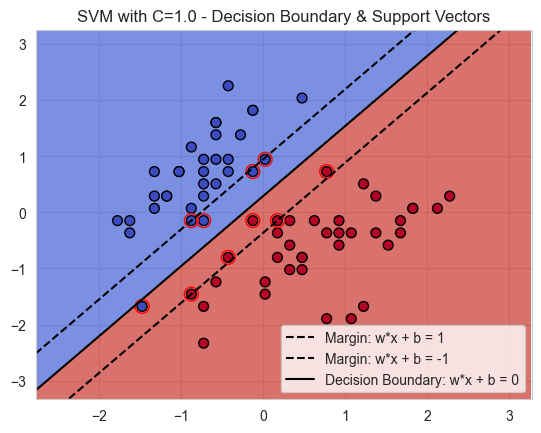

C = 10
  决策边界的参数 (weights): [[ 4.20328347 -2.40806107]]
  截距 (intercept): [1.17863706]
  支持向量的数量: 4



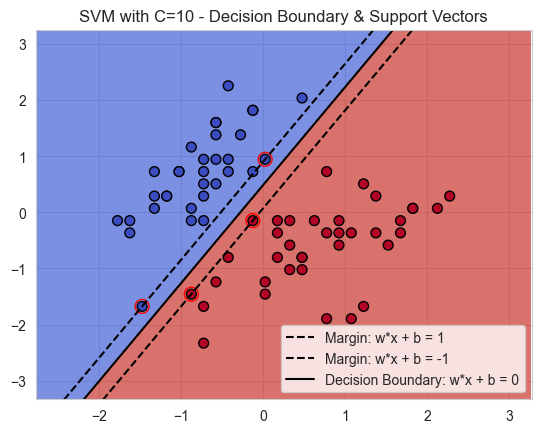

C = 100
  决策边界的参数 (weights): [[ 4.20328347 -2.40806107]]
  截距 (intercept): [1.17863706]
  支持向量的数量: 4



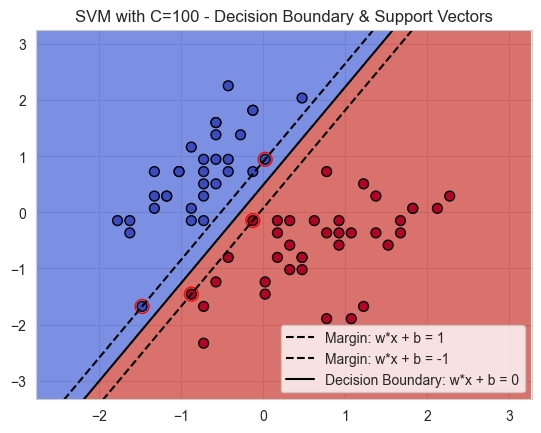

In [21]:
# 尝试不同的 C 值
C_values = [0.01, 0.1, 1.0, 10, 100]
for C in C_values:
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_train, y_train)
    print(f"C = {C}")
    print(f"  决策边界的参数 (weights): {svm.coef_}")
    print(f"  截距 (intercept): {svm.intercept_}")
    print(f"  支持向量的数量: {len(svm.support_vectors_)}\n")
    plot_decision_boundary(svm, X_train, y_train, f"SVM with C={C} - Decision Boundary & Support Vectors")


（2）尝试改变惩罚系数 C，分析其对 iris 分类模型性能的影响，并解释原因。

改变 C 的值会影响模型的分类性能。较小的 C 值允许更多的误分类，可能导致欠拟合；而较大的 C 值会过度拟合训练集，可能导致过拟合。我们可以通过在验证集或测试集上评估模型的准确性来观察 C 值对分类性能的影响。

- **C 较小：** 可能导致较低的准确率，因为间隔过大，模型可能无法很好地拟合数据。
- **C 较大：** 可能导致过拟合，即模型在训练集上表现良好，但在测试集上表现较差。

In [22]:
# 比较不同 C 值的准确率
for C in C_values:
    svm = SVC(kernel='linear', C=C)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"C = {C} 的分类准确率: {accuracy:.4f}")


C = 0.01 的分类准确率: 1.0000
C = 0.1 的分类准确率: 1.0000
C = 1.0 的分类准确率: 1.0000
C = 10 的分类准确率: 1.0000
C = 100 的分类准确率: 1.0000


**7. 结论**

- **线性可分性：** 在这个例子中，选择的两个特征（花萼长度和花萼宽度）对于 Setosa 和 Versicolor 两类是线性可分的，因此我们使用了线性 SVM。
- **SVM 中的 C 值影响：** 较小的 C 值会导致较大的间隔，较少的支持向量，但分类可能存在误差；较大的 C 值会导致较小的间隔，更多的支持向量，可能会导致过拟合。
- **模型性能：** 对于不同的 C 值，我们可以观察其对模型间隔宽度、支持向量数量以及分类准确率的影响，从而找到一个合适的 C 值，以平衡训练误差和模型复杂度。

通过以上分析，可以根据数据集的特点和任务需求选择适当的 SVM 参数，得到最优的分类结果。
  \]
  其中：
  - \( m \) 是样本数量。
  - \( X_{\text{with\_intercept}}^T \) 是将特征矩阵 \( X_{\text{with\_intercept}} \) 转置。
  - \( residual \) 是误差（预测值与真实值之间的差异）。
  
- `np.dot(X_with_intercept.T, residual)` 是矩阵乘法，将转置后的特征矩阵与残差向量相乘，得到每个参数的梯度。
  
- `(2 / X.shape[0])` 是平均化的系数，确保我们计算的是每个样本的平均梯度，而不是所有样本的总梯度。
